# Auto-encoder  (mnist dataset)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.functional import F
import torch
from torch.utils.data import Dataset
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()

X = digits.data
y = digits.target

In [21]:
images = lambda i:i.reshape(8,8)

In [22]:
data = torch.tensor(digits.data,dtype=torch.float32)

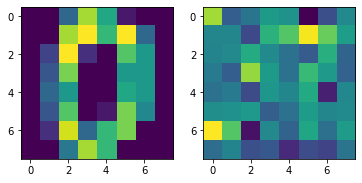

In [60]:
# create a noisy data

class CleanAndNoisy(Dataset):
    def __init__(self):
        
        self.clean_data = data
        
    def __len__(self):
        return len(self.clean_data)
    
    def noise(self,idx):
        # gaussian noise
        
        mean = 0
        std = 2
        
        return torch.normal(mean,std,self.clean_data[idx].shape)
    
    def __getitem__(self,idx):
        return self.clean_data[idx],self.noise(idx)
    
dataset = CleanAndNoisy()

fig,ax = plt.subplots(1,2)
ax[0].imshow(dataset[0][0].reshape(8,8))
ax[1].imshow(dataset[0][1].reshape(8,8))

In [61]:
class Net(nn.Module):
    
    def __init__(self):
        
        super(Net,self).__init__()
        self.enc = self.encoder(8,4)
        self.enc1 = self.encoder(4,2)
        self.dec1 = self.decoder(2,4)
        self.dec = self.decoder(4,8)
    
    def encoder(self,inp,out):
        return nn.Linear(inp,out) # fix the dimentions
    
    def decoder(self,inp,out):
        return nn.Linear(inp,out)
    
    def forward(self,x):
        
        out = F.relu(self.enc(x))
        out = F.relu(self.enc1(out))
        out = F.relu(self.dec1(out))
        out = F.relu(self.dec(out))
        
        return out

In [64]:
model = Net()
print(model)

Net(
  (enc): Linear(in_features=8, out_features=4, bias=True)
  (enc1): Linear(in_features=4, out_features=2, bias=True)
  (dec1): Linear(in_features=2, out_features=4, bias=True)
  (dec): Linear(in_features=4, out_features=8, bias=True)
)


In [65]:
params = [i for i in model.parameters()]

In [66]:
creatrion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [67]:
load_data = torch.utils.data.DataLoader(dataset,batch_size = 32)

In [68]:
print(load_data)

In [70]:
# training

l1_loss = []


for i in range(1000):
       
    clean_image = next(iter(load_data))[0].reshape(32,8,8)
    noisy_image = next(iter(load_data))[1].reshape(32,8,8)

    output = model(noisy_image)
    
    loss = creatrion(clean_image,output)
    
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    if i%100 == 0:
        l1_loss.append(loss.item())
        print(loss.item())


4.775476455688477
4.771825790405273
4.769201755523682
4.766827583312988
4.7645063400268555
4.762026786804199
4.759769916534424
4.7571611404418945
4.754639625549316
4.751893997192383


In [71]:
%matplotlib inline

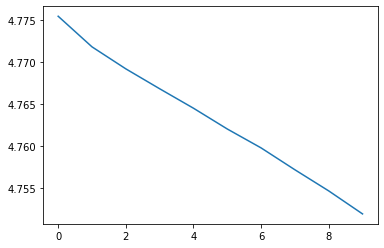

In [72]:
plt.plot(l1_loss)

Text(0.5, 1.0, 'Representation Space')

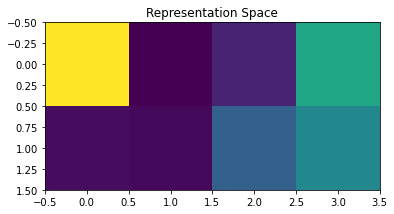

In [73]:
# the representation space output

params = [i for i in model.parameters()]

fig,ax = plt.subplots(1,1)

ax.imshow(params[2].detach().numpy())
ax.set_title("Representation Space")
#print(params)

Text(0.5, 1.0, 'reconstracted image')

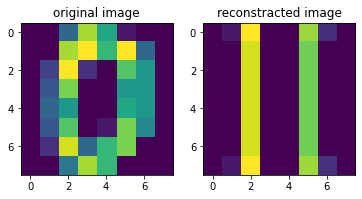

In [74]:
test_image = data[0].reshape(8,8)
output_from_model = model(test_image)

fix,ax = plt.subplots(1,2)

ax[0].imshow(test_image.detach().numpy())
ax[1].imshow(output_from_model.detach().numpy())

ax[0].set_title("original image")
ax[1].set_title("reconstracted image")